In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from ocddetection.data import preprocessing

In [ ]:
ss = pd.Series(
    [f'./data/S{subject}-ADL{run}-AUGMENTED.csv' for subject in range(1, 5) for run in range(1, 6)],
    index=pd.MultiIndex.from_product([list(range(1, 5)), list(range(1, 6))]),
    name='path'
)

In [ ]:
train, val, test = preprocessing.split(
    ss,
    [(subject, 4) for subject in range(1, 5)],
    [(subject, 5) for subject in range(1, 5)]
)

In [2]:
ds = tf.data.Dataset.from_tensor_slices((
    tf.random.uniform((15, 10, 3), 0, 1, dtype=tf.float32),
    tf.random.uniform((15, 10), 0, 2, dtype=tf.int32)
)).batch(4)

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(10, 3)),
    tf.keras.layers.Dense(1)
])

In [4]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1)
)

In [5]:
y_true = ds.map(lambda X, y: y).unbatch()
logits = model.predict(ds).reshape((-1, 10))
y_pred = tf.data.Dataset.from_tensor_slices(tf.round(tf.nn.sigmoid(logits)))

In [6]:
cm = tf.data.Dataset.zip((y_true, y_pred)).reduce(
    tf.zeros((2, 2), dtype=tf.int32),
    lambda state, t: state + tf.math.confusion_matrix(t[0], t[1], num_classes=2)
)

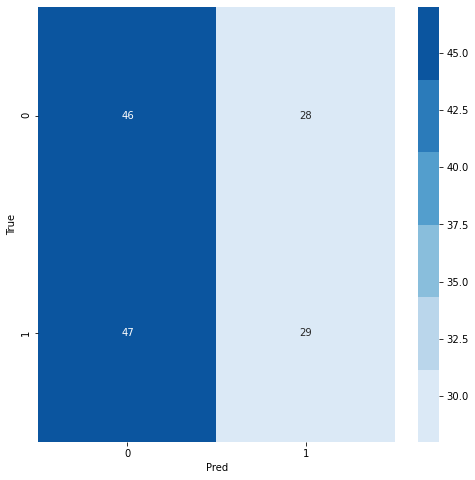

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

sns.heatmap(cm, annot=True, fmt='d', cmap=sns.color_palette("Blues"), ax=ax)
ax.set_xlabel('Pred')
ax.set_ylabel('True')

plt.show()

In [ ]:
mm = cm / cm.numpy().sum(axis=1)[:, tf.newaxis]

In [ ]:
mm

In [ ]:
tf.data.Dataset.zip((y_true, y_pred)).reduce(
    tf.zeros((2, 2), dtype=tf.int32),
    lambda state, t: state + tf.math.confusion_matrix(t[0], t[1], num_classes=2)
)

In [ ]:
tf.math.confusion_matrix(y_true[0], y_pred[0], num_classes=2)

In [ ]:
tf.math.confusion_matrix(y_true[1], y_pred[1], num_classes=2)

In [ ]:
ds = preprocessing.to_federated(val, epochs=3, batch_size=8, window_size=10)

In [ ]:
subject_one = ds.data[1]

In [ ]:
subject_one_it = iter(subject_one)

In [ ]:
next(subject_one_it)

In [ ]:
y = subject_one.map(lambda X, y: y)

In [ ]:
y_true = list(y.as_numpy_iterator())

In [ ]:
y_true_arr = np.asarray(y_true)

In [ ]:
y_true_arr_re = y_true_arr.reshape((-1))

In [ ]:
y_true_arr_re.shape